In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('sensor_data.csv')
df = df.sort_values(by='time_stamp')
id = df['Id'].to_numpy()
time = df['time_stamp']
sA = df['sensor_a'].to_numpy()
sB = df['sensor_b'].to_numpy()
sC = df['sensor_c'].to_numpy()
sD = df['sensor_d'].to_numpy()
data = np.vstack((sA, sB, sC))
data = data.T
print(data.shape)

(16914, 3)


In [3]:
max_features=1.0
n_estimators=100
max_samples='auto'
contamination=float(0.2)
clf=IsolationForest(max_features = max_features, n_estimators=n_estimators,
					 max_samples=max_samples, contamination=contamination
					 , random_state=56)


In [4]:
y_pred = clf.fit_predict(data[:, 1:])
y_pred = (-1*y_pred + 1)/2 

outlier_index = y_pred == 1
print('Anamoly:-', np.sum(y_pred==1))

Anamoly:- 3383


In [5]:
y_pred_df = pd.DataFrame({'Id':id, 'flag':y_pred})
y_pred_df = y_pred_df.sort_values(by='Id')
y_pred_df.to_csv('prediction_iForest.csv', index=False)


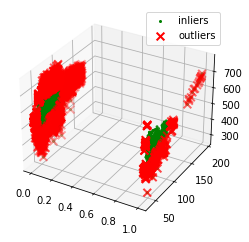

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], zs=data[:, 2], s=4, lw=1, label="inliers",c="green")
ax.scatter(data[outlier_index,0],data[outlier_index,1], data[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()